# Telecom X - Análisis de Evasión de Clientes (LATAM)

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

**El análisis contiene:**
- Importación y manipulación de datos desde una API
- ETL (Extracción, Transformación y Carga)
- Visualizaciones estratégicas para identificar patrones y tendencias
- EDA e informe con insights relevantes


##  Preparación (Imports y Configuración)


In [1]:
import pandas as pd
import numpy as np
import requests, json
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (6,4)


##  Extracción — Carga desde la API (JSON)


In [2]:
# API
URL = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Accediendo a la API
resp = requests.get(URL)
resp.raise_for_status()

# Recuperando los resultados
resultado = json.loads(resp.text)

# Obteniendo vista previa del DataFrame base (anidado)
df = pd.DataFrame(resultado)
display(df.head())
df.info()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##  Transformación — Normalización de columnas anidadas


In [3]:
# Mantener id y objetivo
id_churn = df[['customerID', 'Churn']].copy()

# Normalización de estructuras anidadas
customer = pd.json_normalize(df['customer'])
phone    = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
account  = pd.json_normalize(df['account'])

# Concatenación para crear el DataFrame analítico
telecom_df = pd.concat([id_churn, customer, phone, internet, account], axis=1)
display(telecom_df.sample(4))


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3194,4459-BBGHE,No,Male,0,No,Yes,30,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.50,1307.8
3691,5088-QZLRL,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.65,20.65
2394,3345-CSCIA,,Male,0,No,No,68,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),76.90,5023
4773,6542-LWGXJ,No,Male,0,Yes,No,3,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.00,78.25


##  Estructura — Renombrado de columnas y verificación


In [4]:
telecom_df.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'abandono',
    'gender': 'genero',
    'SeniorCitizen': 'es_ciudadano_senior',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_en_empresa',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'respaldo_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargos_mensuales',
    'Charges.Total': 'cargos_totales'
}, inplace=True)

display(telecom_df.head())
telecom_df.info()


,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   es_ciudadano_senior     7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   tiene_dependientes      7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   tipo_internet           7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

##  Control de calidad (nulos, duplicados, formatos)


In [5]:
print("Duplicados exactos:", telecom_df.duplicated().sum())
display(telecom_df.isnull().sum().sort_values(ascending=False))


Duplicados exactos: 0


id_cliente                0
abandono                  0
genero                    0
es_ciudadano_senior       0
tiene_pareja              0
tiene_dependientes        0
meses_en_empresa          0
servicio_telefonico       0
lineas_multiples          0
tipo_internet             0
seguridad_online          0
respaldo_online           0
proteccion_dispositivo    0
soporte_tecnico           0
tv_streaming              0
peliculas_streaming       0
tipo_contrato             0
factura_electronica       0
metodo_pago               0
cargos_mensuales          0
cargos_totales            0
dtype: int64

##  Limpieza de texto (IDs, contrato, método de pago)


In [6]:
# ID
telecom_df['id_cliente'] = telecom_df['id_cliente'].astype(str).str.strip()

# Contrato
telecom_df['tipo_contrato'] = (telecom_df['tipo_contrato']
                               .astype(str).str.lower()
                               .str.replace('-', ' ', regex=False)
                               .str.replace('_', ' ', regex=False)
                               .str.strip())

# Método de pago
telecom_df['metodo_pago'] = (telecom_df['metodo_pago']
                             .astype(str).str.lower()
                             .str.replace('\n', ' ', regex=True)
                             .str.strip())

display(telecom_df[['id_cliente','tipo_contrato','metodo_pago']].sample(5))


,id_cliente,tipo_contrato,metodo_pago
4583,6283-GITPX,two year,credit card (automatic)
7150,9835-ZIITK,one year,electronic check
4867,6654-QGBZZ,month to month,mailed check
709,1017-FBQMM,one year,credit card (automatic)
2593,3620-MWJNE,month to month,mailed check


##  Limpieza numérica (conversiones y nulos críticos)


In [7]:
# Convertir a numérico y tratar nulos
telecom_df['cargos_mensuales'] = pd.to_numeric(telecom_df['cargos_mensuales'], errors='coerce')
telecom_df['cargos_totales']   = pd.to_numeric(telecom_df['cargos_totales'].replace(' ', np.nan), errors='coerce')
telecom_df['meses_en_empresa'] = pd.to_numeric(telecom_df['meses_en_empresa'], errors='coerce', downcast='integer')

print("Nulos en cargos_totales:", telecom_df['cargos_totales'].isna().sum())
telecom_df = telecom_df.dropna(subset=['cargos_totales'])  # suelen ser clientes muy nuevos o datos incompletos
print("Tamaño tras limpiar:", telecom_df.shape)


Nulos en cargos_totales: 11
Tamaño tras limpiar: (7256, 21)


##  Estandarización (Yes/No → 1/0) y nueva variable `cuentas_diarias`


In [8]:
# Binarias frecuentes
col_binario = ['abandono','tiene_pareja','tiene_dependientes','servicio_telefonico','factura_electronica']
for c in col_binario:
    if c in telecom_df.columns:
        telecom_df[c] = telecom_df[c].astype(str).str.strip().str.title()

telecom_df[col_binario] = (telecom_df[col_binario]
                           .replace({'Yes':1,'No':0,'':np.nan})
                           .fillna(0)
                           .astype(int))

# Nueva columna: prorrateo a valor diario
telecom_df['cuentas_diarias'] = telecom_df['cargos_mensuales'] / 30.0

display(telecom_df[['cargos_mensuales','cuentas_diarias']].sample(5))
telecom_df.info()


/tmp/ipykernel_12138/3308754956.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Yes':1,'No':0,'':np.nan})


,cargos_mensuales,cuentas_diarias
3611,20.85,0.695000
1358,20.40,0.680000
569,99.00,3.300000
2401,54.10,1.803333
6448,86.45,2.881667


<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7256 non-null   object 
 1   abandono                7256 non-null   int64  
 2   genero                  7256 non-null   object 
 3   es_ciudadano_senior     7256 non-null   int64  
 4   tiene_pareja            7256 non-null   int64  
 5   tiene_dependientes      7256 non-null   int64  
 6   meses_en_empresa        7256 non-null   int8   
 7   servicio_telefonico     7256 non-null   int64  
 8   lineas_multiples        7256 non-null   object 
 9   tipo_internet           7256 non-null   object 
 10  seguridad_online        7256 non-null   object 
 11  respaldo_online         7256 non-null   object 
 12  proteccion_dispositivo  7256 non-null   object 
 13  soporte_tecnico         7256 non-null   object 
 14  tv_streaming            7256 non-null   objec

##  Análisis descriptivo (numéricas)


In [9]:
desc = telecom_df[['meses_en_empresa','cargos_mensuales','cargos_totales','cuentas_diarias']].describe()
display(desc)

skew = telecom_df[['meses_en_empresa','cargos_mensuales','cargos_totales','cuentas_diarias']].skew()
kurt = telecom_df[['meses_en_empresa','cargos_mensuales','cargos_totales','cuentas_diarias']].kurt()
display(pd.DataFrame({'skew':skew,'kurtosis':kurt}))


,meses_en_empresa,cargos_mensuales,cargos_totales,cuentas_diarias
count,7256.000000,7256.000000,7256.000000,7256.000000
mean,32.395535,64.755423,2280.634213,2.158514
std,24.558067,30.125739,2268.632997,1.004191
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.450000,400.225000,1.181667
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.900000,3785.300000,2.996667
max,72.000000,118.750000,8684.800000,3.958333


,skew,kurtosis
meses_en_empresa,0.237761,-1.389420
cargos_mensuales,-0.218065,-1.260469
cargos_totales,0.964218,-0.230473
cuentas_diarias,-0.218065,-1.260469


##  Distribución de la variable de evasión (`abandono`)


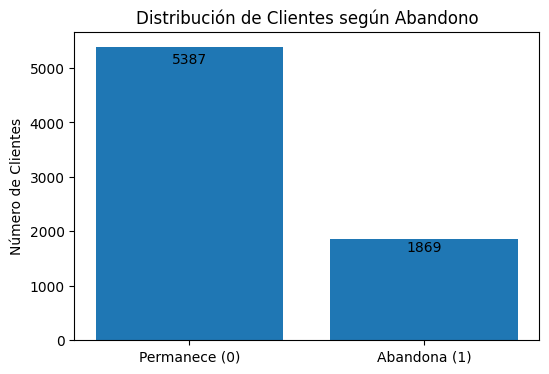

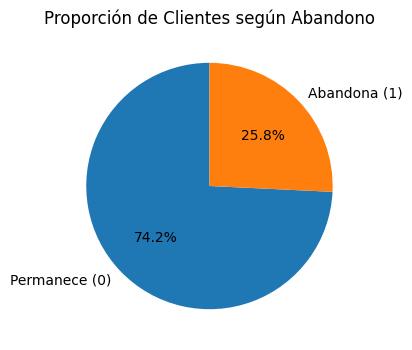

In [10]:
abandono_counts = telecom_df['abandono'].value_counts().sort_index()
labels = ['Permanece (0)', 'Abandona (1)']

# Barras
plt.figure()
plt.bar(labels, abandono_counts.values)
plt.title('Distribución de Clientes según Abandono')
plt.ylabel('Número de Clientes')
for i,v in enumerate(abandono_counts.values):
    plt.text(i, v*0.98, f'{v}', ha='center', va='top')
plt.show()

# Pastel
plt.figure()
plt.pie(abandono_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Clientes según Abandono')
plt.show()


##  Churn por variables categóricas (contrato, pago, internet, género)


,% Permanece (0),% Abandona (1)
tipo_contrato,,
month to month,58.676654,41.323346
one year,89.064559,10.935441
two year,97.230237,2.769763


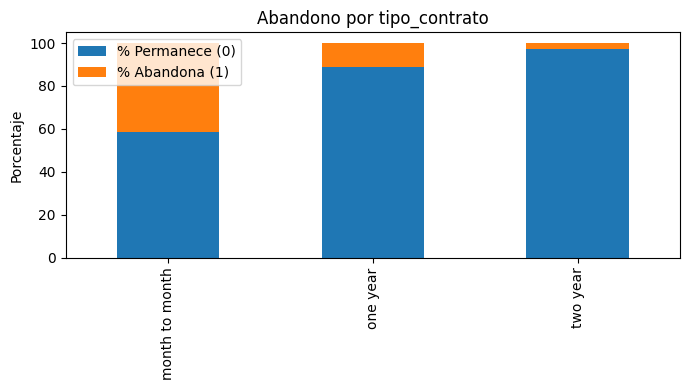

,% Permanece (0),% Abandona (1)
metodo_pago,,
electronic check,56.196319,43.803681
mailed check,81.412191,18.587809
bank transfer (automatic),83.742911,16.257089
credit card (automatic),85.194639,14.805361


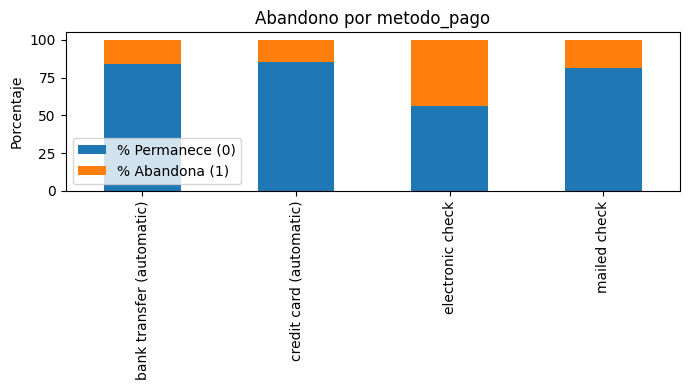

,% Permanece (0),% Abandona (1)
tipo_internet,,
Fiber optic,59.443402,40.556598
DSL,81.514297,18.485703
No,92.825397,7.174603


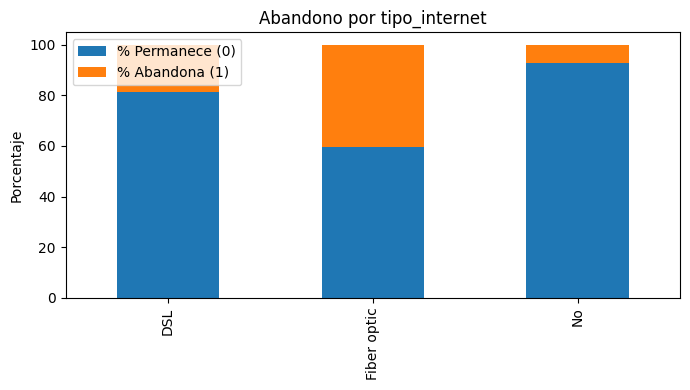

,% Permanece (0),% Abandona (1)
genero,,
Female,73.822135,26.177865
Male,74.652494,25.347506


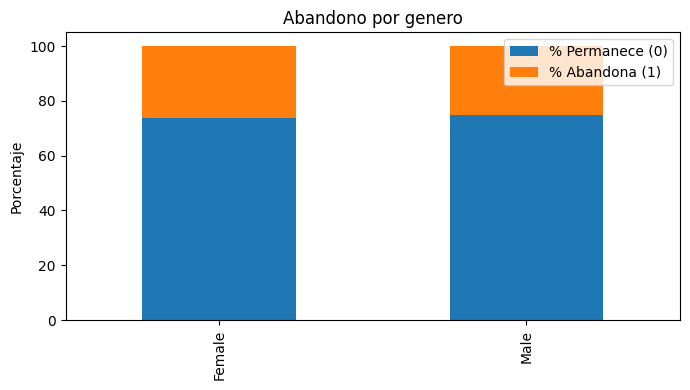

In [11]:
def churn_por_categoria(df, col):
    tab = pd.crosstab(df[col], df['abandono'], normalize='index') * 100
    tab.columns = ['% Permanece (0)','% Abandona (1)']
    display(tab.sort_values('% Abandona (1)', ascending=False))
    ax = tab.plot(kind='bar', stacked=True, figsize=(7,4))
    ax.set_title(f'Abandono por {col}')
    ax.set_ylabel('Porcentaje')
    ax.set_xlabel('')
    plt.tight_layout()
    plt.show()

for c in ['tipo_contrato','metodo_pago','tipo_internet','genero']:
    if c in telecom_df.columns:
        churn_por_categoria(telecom_df, c)


##  Churn por rangos (bins) de variables numéricas


,% Permanece (0),% Abandona (1)
meses_en_empresa_bin,,
"(0.999, 6.0]",48.590164,51.409836
"(6.0, 20.0]",67.456446,32.543554
"(20.0, 40.0]",78.305785,21.694215
"(40.0, 60.0]",84.924623,15.075377
"(60.0, 72.0]",93.590627,6.409373


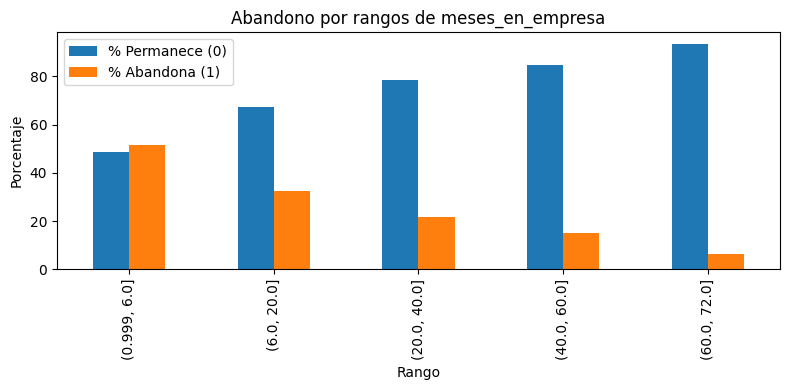

,% Permanece (0),% Abandona (1)
cargos_mensuales_bin,,
"(18.249, 25.05]",91.114149,8.885851
"(25.05, 58.7]",75.763889,24.236111
"(58.7, 79.1]",71.114168,28.885832
"(79.1, 94.3]",64.872326,35.127674
"(94.3, 118.75]",68.206897,31.793103


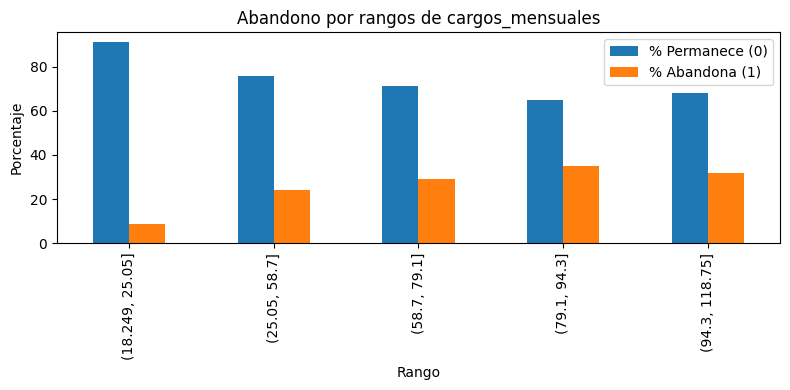

,% Permanece (0),% Abandona (1)
cargos_totales_bin,,
"(18.799, 266.6]",55.509642,44.490358
"(266.6, 939.7]",72.019297,27.980703
"(939.7, 2033.85]",79.807030,20.192970
"(2033.85, 4479.2]",77.601654,22.398346
"(4479.2, 8684.8]",86.285320,13.714680


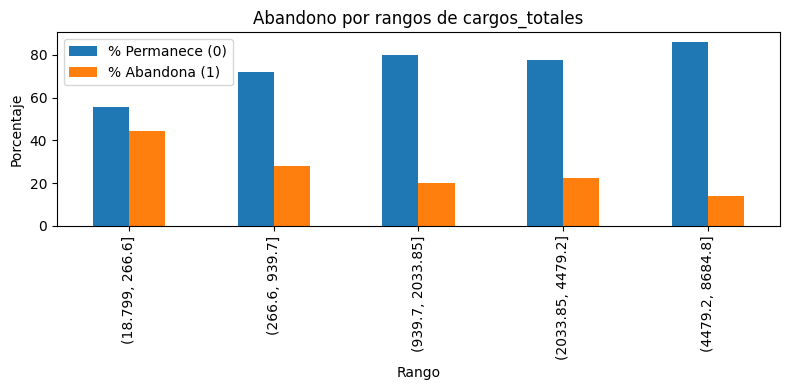

,% Permanece (0),% Abandona (1)
cuentas_diarias_bin,,
"(0.607, 0.835]",91.114149,8.885851
"(0.835, 1.957]",75.763889,24.236111
"(1.957, 2.637]",71.114168,28.885832
"(2.637, 3.143]",64.872326,35.127674
"(3.143, 3.958]",68.206897,31.793103


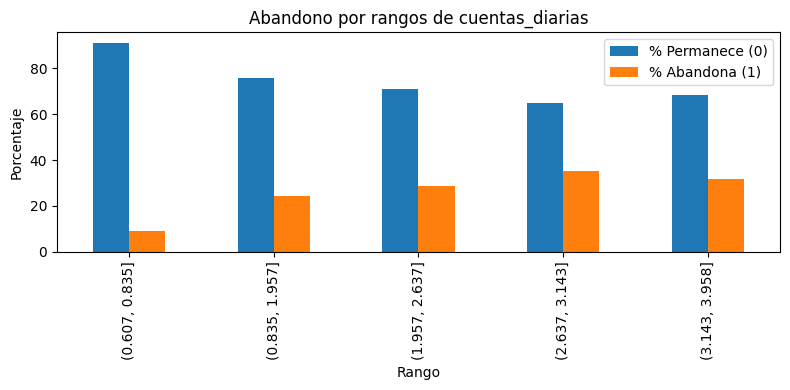

In [12]:
def churn_por_bins(df, col, q=5):
    df_tmp = df.copy()
    df_tmp[f'{col}_bin'] = pd.qcut(df_tmp[col], q=q, duplicates='drop')
    tab = pd.crosstab(df_tmp[f'{col}_bin'], df_tmp['abandono'], normalize='index') * 100
    tab.columns = ['% Permanece (0)','% Abandona (1)']
    display(tab)
    ax = tab.plot(kind='bar', figsize=(8,4))
    ax.set_title(f'Abandono por rangos de {col}')
    ax.set_ylabel('Porcentaje')
    ax.set_xlabel('Rango')
    plt.tight_layout()
    plt.show()

for c in ['meses_en_empresa','cargos_mensuales','cargos_totales','cuentas_diarias']:
    if c in telecom_df.columns:
        churn_por_bins(telecom_df, c, q=5)


##  Mapa de calor de correlaciones (numéricas)


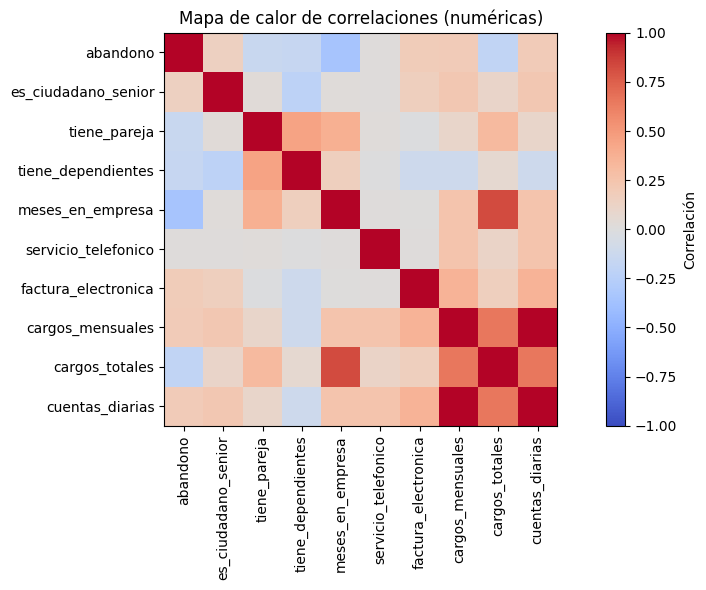

abandono               1.000000
cuentas_diarias        0.189393
cargos_mensuales       0.189393
factura_electronica    0.186309
es_ciudadano_senior    0.146400
servicio_telefonico    0.012337
tiene_pareja          -0.148106
tiene_dependientes    -0.160347
cargos_totales        -0.194440
meses_en_empresa      -0.345799
Name: abandono, dtype: float64

In [13]:
num_cols = telecom_df.select_dtypes(include=[np.number]).columns
corr = telecom_df[num_cols].corr()

plt.figure(figsize=(10,6))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlación')
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Mapa de calor de correlaciones (numéricas)')
plt.tight_layout()
plt.show()

# Vista de correlaciones contra la variable objetivo (si existe)
if 'abandono' in corr.columns:
    display(corr['abandono'].sort_values(ascending=False))


##  Conclusiones 

- **Contrato mensual** suele concentrar mayor churn; los contratos más largos reducen la evasión.  
- **Clientes nuevos** (baja tenencia) abandonan más → priorizar retención temprana.  
- **Cargos mensuales altos** incrementan el riesgo si no hay valor agregado percibido.  
- **Electronic check** suele asociarse con mayor churn vs pagos automáticos.  
- **Servicios y engagement** (soporte, seguridad) tienden a disminuir la evasión.

## Recomendaciones

1. **Onboarding 0–6 meses** con contacto proactivo y beneficios.  
2. **Migración a contratos anual/bianual** con incentivos.  
3. **Revisión de planes de alto cargo** (bundles de valor/downgrade acompañados).  
4. **Fomentar pagos automáticos** (tarjeta/transferencia).  
5. **Campañas preventivas** para perfiles de riesgo combinando señales (contrato mensual + baja tenencia + electronic check + cargos altos).
